In [293]:
!pip install geopandas


In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from resource_functions import *
from florest_plot import *

# Base de Dados - World Development Indicators (WDI)

Os Indicadores de Desenvolvimento Mundial (WDI) são a principal coleção de indicadores de desenvolvimento do Banco Mundial, compilados a partir de fontes internacionais oficialmente reconhecidas. Apresenta os dados de desenvolvimento global mais atuais e precisos disponíveis e inclui estimativas nacionais, regionais e globais.

Os Indicadores de Desenvolvimento Mundial são uma compilação de estatísticas relevantes, de alta qualidade e comparáveis internacionalmente sobre o desenvolvimento global e a luta contra a pobreza. A base de dados contém 1.400 indicadores de séries cronológicas para 217 economias e mais de 40 grupos de países, com dados para muitos indicadores que remontam a mais de 50 anos [[1](https://datatopics.worldbank.org/world-development-indicators/)]. 

## Objetivos
Para este estudo, optamos por utilizar alguns dos indicadores e avaliar como eles se comportam em diferentes grupos de países. Ao final, pretende-se respoder as perguntas:

  1. Quais grupos de países possuem maior serie historia dos indicadores?
  2. Quais regiões possuem maior cobertura de dados?
  3. Como os indicadores variaram durante os anos para cada grupo de países?

### Objetivos específicos

Para responder as perguntas precisamos seguir uma sequencia de análises e trasnsformações nos dados. Dessa forma, seguem os objetivos específicos deste trabalho:

 * Coletar os dados
 * Identificar as bases com os indicadores relevantes
 * Filtrar inconsistências das bases de dados
 * Agrupar, as beses com informações relevantes
 * Compiolar os historicos dos indicadores
 * Gerar graficos e tabelas que auxiliem a visualização das análises.

## Indicadores utilizados 

Os indicadores utilizados são os relacionados com:

  1. Pobreza e Desigualdade:
     * "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"  (SI.POV.DDAY)
        * Esse indicador mostra s porcentagem de pessoas vivendo com menos de $2.15 por dia, considerando os preços internacionais do ano de 2017. 
  2. Demografia
     * "Population, total" (SP.POP.TOTL)
        * População total do pais, independentemente da situação de cidadania e status legal.
     * "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)" (SL.TLF.CACT.ZS)
        * Porcentagem da população com 15 anos ou mais que é economicamente ativa.
     * "School enrollment, primary and secondary (gross), gender parity index (GPI)" (SE.ENR.PRSC.FM.ZS)
        * indice da relação entre gêneros que frequentam escola primaria e secundária.
  3. Meio ambiente
     * "CO2 emissions (metric tons per capita)" (EN.ATM.CO2E.PC)
     * "Forest area (% of land area)" (AG.LND.FRST.ZS)
     * "Access to electricity, urban (% of urban population)" (EG.ELC.ACCS.UR.ZS)

## Bases de dados
Vamos utilizar as bases WDIData e WDICountry

In [295]:
FOLDER_PATH = './bases'
#wdi_country_series_df = pd.read_csv(f'{FOLDER_PATH}/WDICountry-Series.csv', sep=',')
wdi_data_df = pd.read_csv(f'{FOLDER_PATH}/WDIData.csv', sep=',')
#wdi_foot_note_df = pd.read_csv(f'{FOLDER_PATH}/WDIFootNote.csv', sep=',')
#wdi_series_time_df = pd.read_csv(f'{FOLDER_PATH}/WDISeries-Time.csv', sep=',')
#wdi_series_df = pd.read_csv(f'{FOLDER_PATH}/WDISeries.csv', sep=',')
wdi_country_df = pd.read_csv(f'{FOLDER_PATH}/WDICountry.csv', sep=',')

### WDICountry

In [296]:
wdi_country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [297]:
print(wdi_country_df.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')


### Metadata

#### Colunas:

- **Country Code** =   **Código do País**
- **Short Name** =   **Nome Curto**
- **Table Name** =   **Nome da Tabela**
- **Long Name** =   **Nome Completo**
- **2-alpha code** =   **Código 2-alpha**
- **Currency Unit** =   **Unidade Monetária**
- **Special Notes** =   **Notas Especiais**
- **Region** =   **Região**
- **Income Group** =   **Grupo de Renda**
- **WB-2 code** =   **Código WB-2**
- **National accounts base year** =   **Ano Base das Contas Nacionais**
- **National accounts reference year** =   **Ano de Referência das Contas Nacionais**
- **SNA price valuation** =   **Avaliação de Preços pelo SNA**
- **Lending category** =   **Categoria de Empréstimo**
- **Other groups** =   **Outros Grupos**
- **System of National Accounts** =   **Sistema de Contas Nacionais**
- **Alternative conversion factor** =   **Fator de Conversão Alternativo**
- **PPP survey year** =   **Ano da Pesquisa PPC**
- **Balance of Payments Manual in use** =   **Manual de Balanço de Pagamentos em Uso**
- **External debt Reporting status** =   **Status de Relato de Dívida Externa**
- **System of trade** =   **Sistema de Comércio**
- **Government Accounting concept** =   **Conceito de Contabilidade Governamental**
- **IMF data dissemination standard** =   **Padrão de Disseminação de Dados do FMI**
- **Latest population census** =   **Último Censo Populacional**
- **Latest household survey** =   **Última Pesquisa Domiciliar**
- **Source of most recent Income and expenditure data** =   **Fonte dos Dados mais Recentes de Renda e Despesa**
- **Vital registration complete** =   **Registro Vital Completo**
- **Latest agricultural census** =   **Último Censo Agrícola**
- **Latest industrial data** =   **Dados Industriais mais Recentes**
- **Latest trade data** =   **Dados Comerciais mais Recentes**


Essa base nor fornece informações sobre o grupo de populações e os grupos de países. Essas informações serão úteis na agregação dos indicadores dentro desses grupos.

Última coluna não possui dados, e vamos desconsiderar.
### Retirando última coluna

In [298]:
wdi_country_df = wdi_country_df.drop("Unnamed: 30", axis = 1)

Selecionando algumas colunas para a primeira analise que será com base nos parâmetros de renda e região,

In [299]:
wdi_country_Slice = wdi_country_df[["Country Code", "Short Name", "Region", "Income Group"]]

In [300]:
wdi_country_Slice.head()

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFE,Africa Eastern and Southern,NaN,NaN
2,AFG,Afghanistan,South Asia,Low income
3,AFW,Africa Western and Central,NaN,NaN
4,AGO,Angola,Sub-Saharan Africa,Lower middle income


In [301]:
wdi_country_Slice['Income Group'].unique()

array(['High income', nan, 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

Temos 4 categorias e alguns paises que nao possuem essa informação, representados por "nan". 

In [302]:
incomegroups = [i for i in wdi_country_Slice['Income Group'].unique() if type(i) == str]
wdi_country_Slice['Income Group'].value_counts()

High income            82
Lower middle income    54
Upper middle income    54
Low income             26
Name: Income Group, dtype: int64

C:\Users\Renato\source\repos\ADA SANTANDER\Curso\Técnicas de Programação I\Projeto02\TecnicasProgramacaoAda\resource_functions.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  


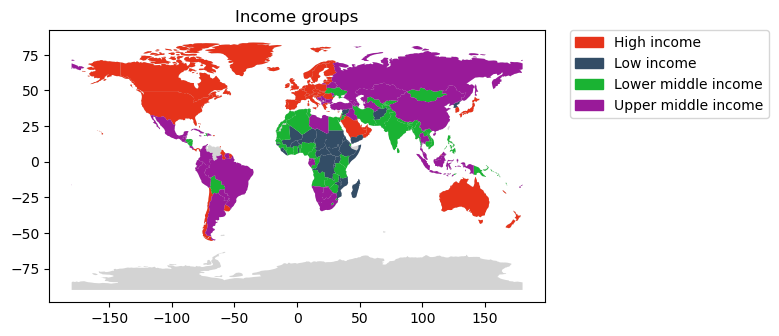

In [303]:
plot_income_group(wdi_country_Slice, incomegroups)

## WDI Data

In [304]:
wdi_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


## Removendo a ultima coluna

In [305]:
wdi_data_df = wdi_data_df.drop("Unnamed: 67", axis = 1)

## Paises com maior historico de dados para cada indicador 

In [306]:
# Contando os dados
wdi_data_df['non_nan_count'] = wdi_data_df.notna().sum(axis=1)

In [307]:
# "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"  (SI.POV.DDAY)
poverty_headcount_ratio = wdi_data_df[wdi_data_df["Indicator Code"] == 'SI.POV.DDAY']
poverty_headcount_ratio_sorted = poverty_headcount_ratio.sort_values(by='non_nan_count', ascending=False)
# "Population, total" (SP.POP.TOTL)
population_total = wdi_data_df[wdi_data_df["Indicator Code"] == 'SP.POP.TOTL']
population_total_sorted = population_total.sort_values(by='non_nan_count', ascending=False)
# "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)" (SL.TLF.CACT.ZS)
labor_force_participation_rate = wdi_data_df[wdi_data_df["Indicator Code"] == 'SL.TLF.CACT.ZS']
labor_force_participation_rate_sorted = labor_force_participation_rate.sort_values(by='non_nan_count', ascending=False)
# "School enrollment, primary and secondary (gross), gender parity index (GPI)" (SE.ENR.PRSC.FM.ZS)
school_enrollment = wdi_data_df[wdi_data_df["Indicator Code"] == 'SE.ENR.PRSC.FM.ZS']
school_enrollment_sorted = school_enrollment.sort_values(by='non_nan_count', ascending=False)
# "CO2 emissions (metric tons per capita)" (EN.ATM.CO2E.PC)
co2_emissions = wdi_data_df[wdi_data_df["Indicator Code"] == 'EN.ATM.CO2E.PC']
co2_emissions_sorted = co2_emissions.sort_values(by='non_nan_count', ascending=False)
# "Forest area (% of land area)" (AG.LND.FRST.ZS)
forest_area = wdi_data_df[wdi_data_df["Indicator Code"] == 'AG.LND.FRST.ZS']
forest_area_sorted = forest_area.sort_values(by='non_nan_count', ascending=False)
# "Access to electricity, urban (% of urban population)" (EG.ELC.ACCS.UR.ZS)
access_to_electricity_urban = wdi_data_df[wdi_data_df["Indicator Code"] == 'EG.ELC.ACCS.UR.ZS']
access_to_electricity_urban_sorted = access_to_electricity_urban.sort_values(by='non_nan_count', ascending=False)

# População mundial

In [308]:
population_total_world = population_total_sorted[population_total_sorted["Country Code"] == "WLD"]

<Axes: title={'center': 'Population total world'}, xlabel='Year', ylabel='Population total'>

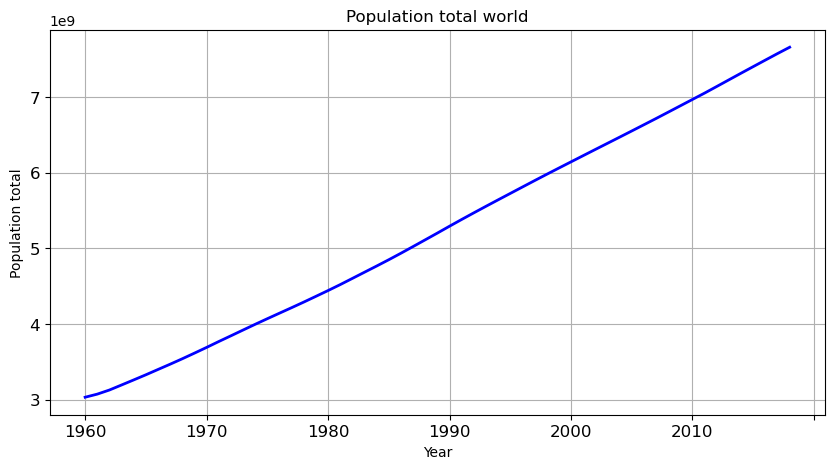

In [309]:
population_total_world.loc[:, "1960":"2018"].T.plot( legend = False, title = "Population total world", 
                                                    color = "blue", figsize = (10, 5), grid = True, linewidth = 2,
                                                    xlabel = "Year", ylabel = "Population total", fontsize = 12)

In [310]:
poverty_headcount_ratio.shape

(266, 68)

In [311]:
incomegroups

['High income', 'Low income', 'Lower middle income', 'Upper middle income']

In [312]:
high_income = wdi_country_Slice[wdi_country_Slice['Income Group'] == 'High income']
low_income = wdi_country_Slice[wdi_country_Slice['Income Group'] == 'Low income']
high_income.shape

(82, 4)

In [313]:
high_income_indicator_poverty = high_income.merge(poverty_headcount_ratio, on = 'Country Code', how = 'inner')
low_income_indicator_poverty = low_income.merge(poverty_headcount_ratio, on = 'Country Code', how = 'inner')

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) - High income'}, xlabel='Year', ylabel='Poverty headcount ratio'>

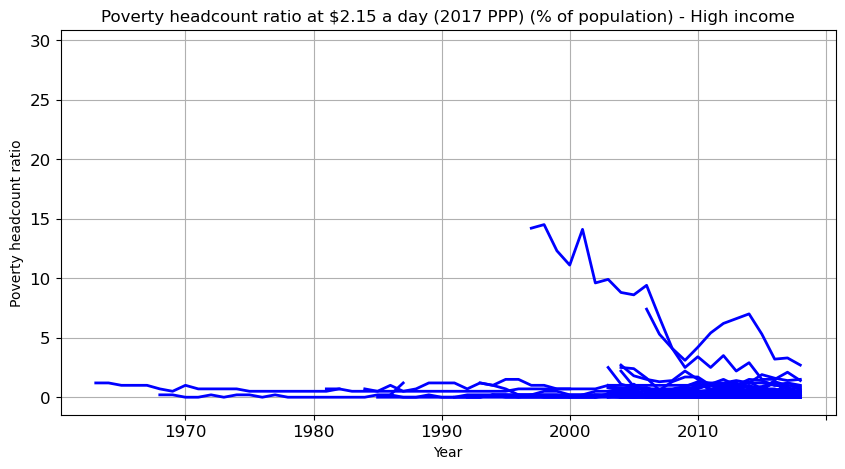

In [314]:
high_income_indicator_poverty.loc[:, "1960":"2018"].T.plot(legend = False, title = "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) - High income",
                                                            color = "blue", figsize = (10, 5), grid = True, linewidth = 2,
                                                            xlabel = "Year", ylabel = "Poverty headcount ratio", fontsize = 12)

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) - Low income'}, xlabel='Year', ylabel='Poverty headcount ratio'>

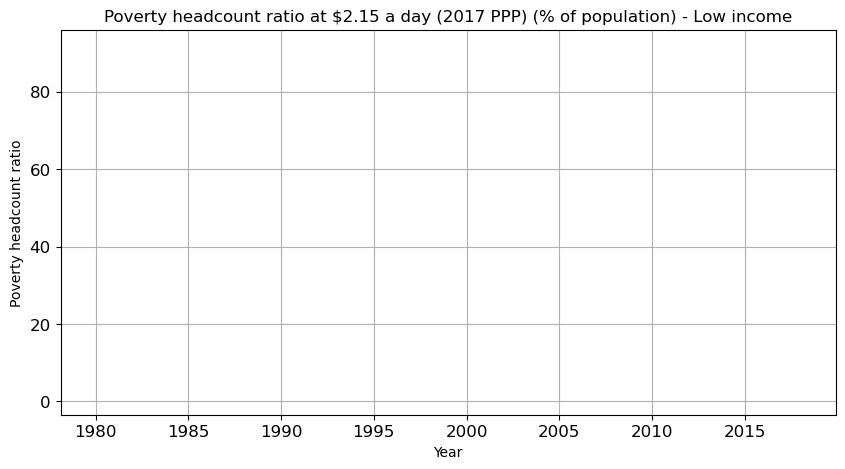

In [315]:
low_income_indicator_poverty.loc[:, "1960":"2018"].T.plot(legend = False, title = "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) - Low income",
                                                            color = "blue", figsize = (10, 5), grid = True, linewidth = 2,
                                                            xlabel = "Year", ylabel = "Poverty headcount ratio", fontsize = 12)

# Analise dos dados Dos indicadores



Quais indicadores tem historico mais longo dos dados

In [316]:
wdi_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,non_nan_count
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,26
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,26
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,26
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,26
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,24


In [317]:
wdi_data_df['Indicator Name'].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       ...,
       'Women who were first married by age 18 (% of women ages 20-24)',
       "Women's share of population ages 15+ living with HIV (%)",
       'Young people (ages 15-24) newly infected with HIV'], dtype=object)

### Indicadores - Meio Ambiente
#### CO2 emissions (metric tons per capita)

In [318]:
filter = wdi_data_df['Indicator Code'] == 'EN.ATM.CO2E.PC'
wdi_data_df[filter].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,non_nan_count
193,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,35
1679,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,35
3165,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,4.439511,4.450525,4.402999,4.350684,4.222333,4.181158,3.929078,NaN,NaN,35
4651,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.582121,5.437587,5.123422,4.971950,5.125870,5.066605,4.402688,NaN,NaN,35
6137,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.139710,6.244133,6.376606,6.658388,6.616508,6.285364,5.857206,NaN,NaN,35


In [319]:
wdi_data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'non_nan_count'],
      dtype='object')

In [320]:
wdi_merge = wdi_country_df.merge(wdi_data_df, on='Country Code', how='left')

In [321]:
filter = wdi_merge['Indicator Code'] == 'EN.ATM.CO2E.PC'
emitentes = wdi_merge[filter]

In [322]:
regioes_2019 = emitentes.groupby('Region').agg({'2019':['mean','max','min']})
regioes_2019

2019                      
                                 mean        max        min
Region                                                     
East Asia & Pacific          4.530087  16.111933   0.451560
Europe & Central Asia        5.680386  15.323040   0.960233
Latin America & Caribbean    2.977974  11.313032   0.297241
Middle East & North Africa   8.800405  31.877203   0.354864
North America               14.863064  15.052747  14.673381
South Asia                   1.352501   3.963267   0.297564
Sub-Saharan Africa           0.902467   7.688908   0.033715

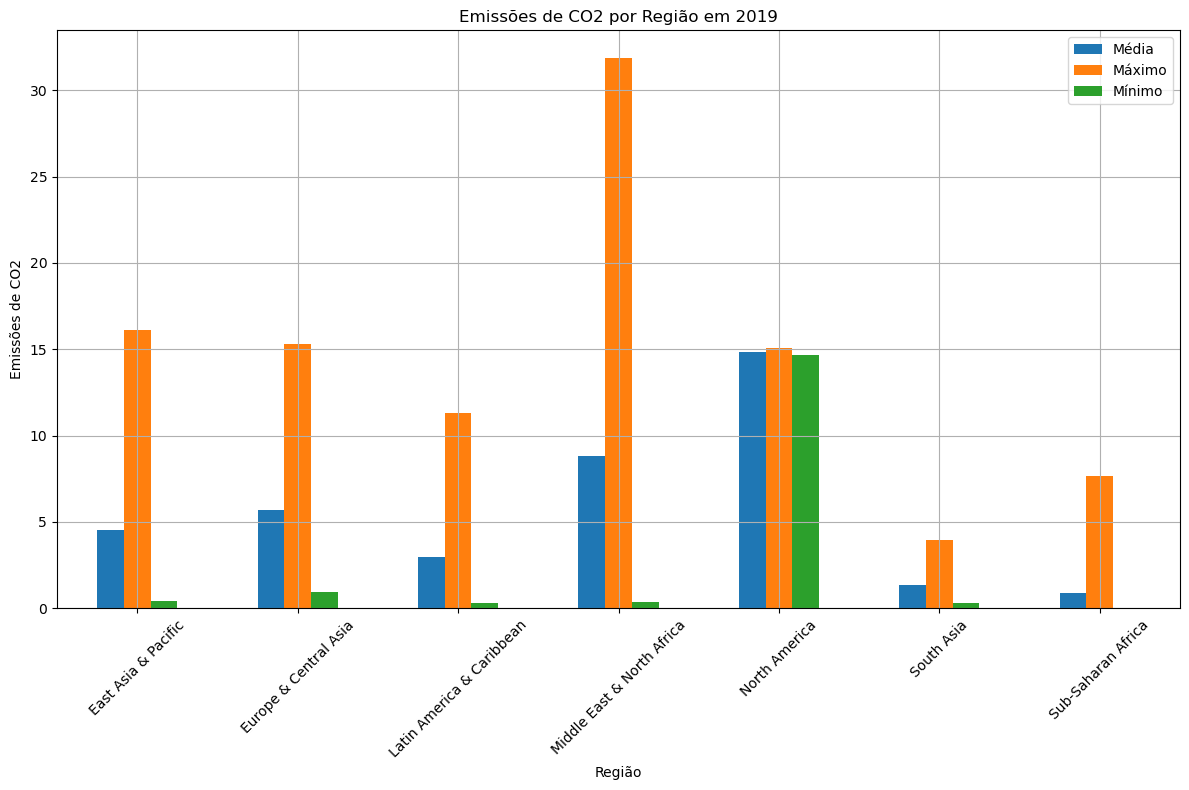

In [323]:
regioes_2019.plot(kind='bar', figsize=(12, 8))
plt.title('Emissões de CO2 por Região em 2019')
plt.xlabel('Região')
plt.ylabel('Emissões de CO2')
plt.legend(['Média', 'Máximo', 'Mínimo'])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout() 
plt.show()

In [324]:
anos = {str(ano): 'mean' for ano in range(2012, 2021)}
emissao_periodo = emitentes.agg(anos)
emissao_periodo

2012    4.306728
2013    4.274821
2014    4.186761
2015    4.122951
2016    4.105521
2017    4.108484
2018    4.102909
2019    4.044442
2020    3.767934
dtype: float64

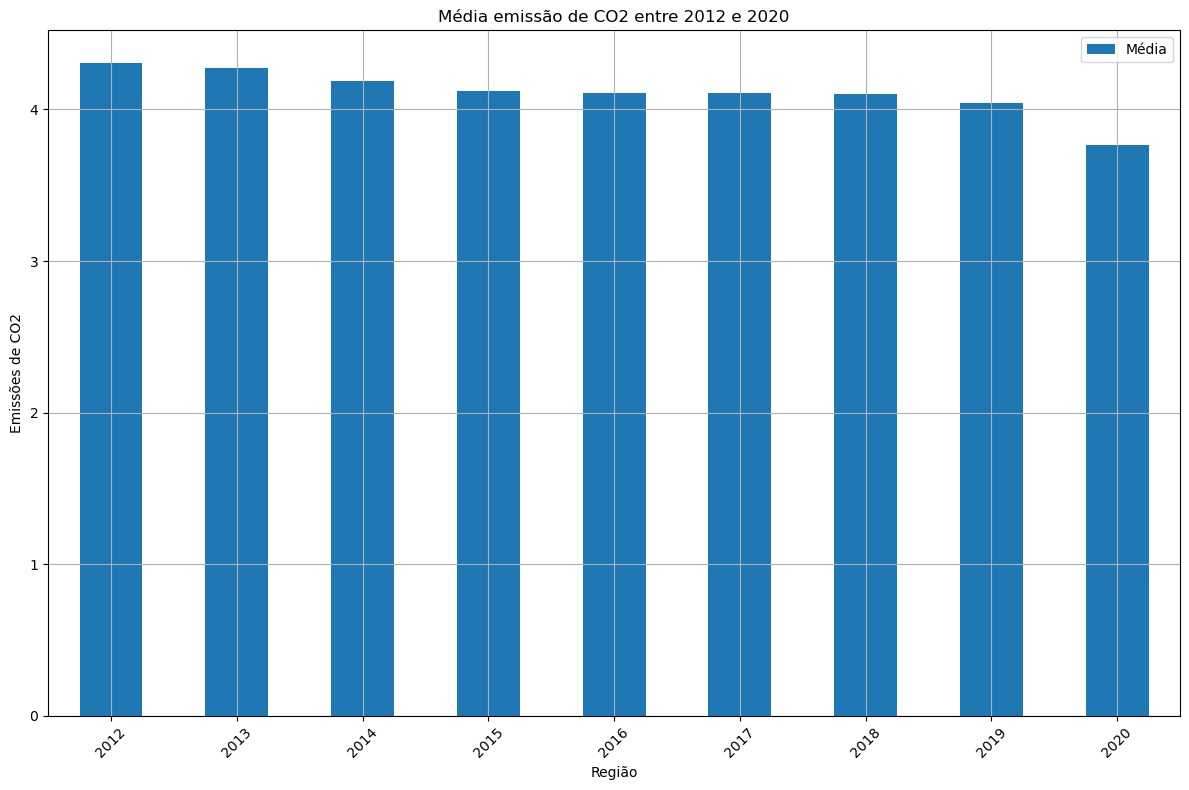

In [325]:
emissao_periodo.plot(kind='bar', figsize=(12, 8))
plt.title('Média emissão de CO2 entre 2012 e 2020')
plt.xlabel('Região')
plt.ylabel('Emissões de CO2')
plt.legend(['Média', 'Máximo', 'Mínimo'])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout() 
plt.show()

In [326]:
anos_valores = {str(ano): 'mean' for ano in range(1993, 2021)}
regioes = emitentes.groupby('Region').agg(anos_valores)
regioes

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,3.823572,3.862350,3.923396,3.925324,3.986891,3.817124,3.830154,3.938499,3.951579,3.955504,...,4.301659,4.348927,4.362780,4.334083,4.261981,4.343608,4.482754,4.519154,4.530087,4.317147
Europe & Central Asia,7.221064,6.919069,6.710826,6.869317,6.726282,6.702729,6.540034,6.561905,6.673893,6.719777,...,6.622288,6.420504,6.302112,5.962711,5.888206,5.907036,5.964762,5.919926,5.680386,5.238824
Latin America & Caribbean,2.182871,2.200860,2.258366,2.318979,2.406643,2.518055,2.516094,2.476648,2.528763,2.502768,...,3.057420,3.115423,3.152469,3.101879,3.092636,3.039354,2.935096,2.975955,2.977974,2.663882
Middle East & North Africa,8.493983,9.009269,9.094649,9.205608,9.540952,9.518149,9.623541,9.546843,9.720877,9.939057,...,9.543212,9.942239,9.684467,9.595356,9.349992,9.094815,8.923774,8.702174,8.800405,8.481052
North America,16.965820,17.158345,17.253682,17.583990,18.137351,18.171429,18.179798,18.613632,18.251487,18.082970,...,16.301231,15.763292,15.975993,15.946547,15.604961,15.285853,15.185220,15.429586,14.863064,13.316101
South Asia,0.378302,0.391983,0.437468,0.474533,0.522680,0.504944,0.573709,0.593636,0.597108,0.658349,...,0.944798,1.011435,0.989183,1.100056,1.101215,1.199539,1.249682,1.324757,1.352501,1.099134
Sub-Saharan Africa,0.634873,0.644734,0.665650,0.691729,0.712564,0.752540,0.790603,0.735760,0.787962,0.763006,...,0.867236,0.862436,0.876374,0.905519,0.897999,0.911577,0.903075,0.908853,0.902467,0.833318


<Axes: title={'center': 'Emissão de CO2 de 2010 a 2020 por região'}, xlabel='Anos', ylabel='Emissão CO2'>

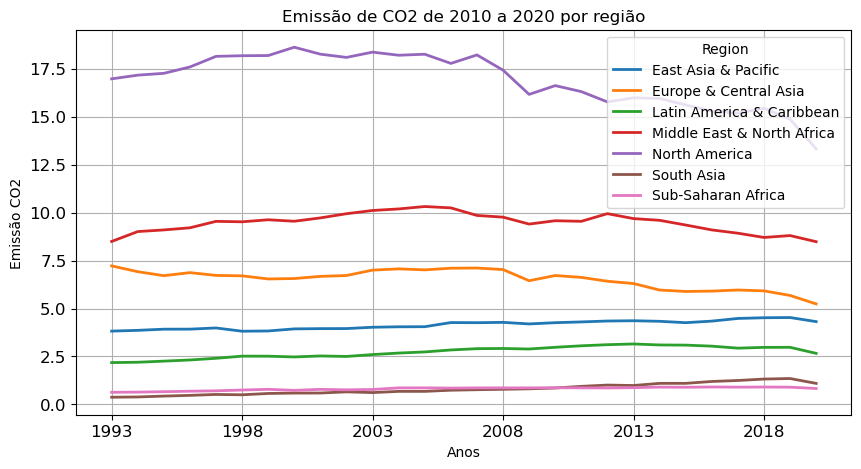

In [327]:
regioes.T.plot( legend = True, title = "Emissão de CO2 de 2010 a 2020 por região", figsize = (10, 5), grid = True, linewidth = 2, xlabel = "Anos", ylabel = "Emissão CO2", fontsize = 12)

In [335]:
#Forest area (% of land area)

filter = wdi_merge['Indicator Code'] == 'AG.LND.FRST.ZS'
area_florestal = wdi_merge[filter]

area_florestal_slice = area_florestal[["Country Code", "Short Name", "Region", "Indicator Code", "2021"]]
area_florestal_slice.head()

,Country Code,Short Name,Region,Indicator Code,2021
466,ABW,Aruba,Latin America & Caribbean,AG.LND.FRST.ZS,2.333333
1952,AFE,Africa Eastern and Southern,NaN,AG.LND.FRST.ZS,29.955194
3438,AFG,Afghanistan,South Asia,AG.LND.FRST.ZS,1.852782
4924,AFW,Africa Western and Central,NaN,AG.LND.FRST.ZS,19.732037
6410,AGO,Angola,Sub-Saharan Africa,AG.LND.FRST.ZS,52.981722


In [ ]:
incomegroups = [i for i in area_florestal_slice['Region'].unique() if type(i) == str]

plot_forest_area_group(area_florestal_slice, incomegroups)

C:\Users\Renato\source\repos\ADA SANTANDER\Curso\Técnicas de Programação I\Projeto02\TecnicasProgramacaoAda\florest_plot.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
